```Gabriel A. Amici - 23/05/2025```

# Comparação entre diferentes potenciais

Potenciais:
1. Coulomb
2. soft-Coulomb
3. Morse-soft-Coulomb
4. normaized Morse-soft-Coulomb

In [1]:
!which python
import emerald
emerald.__file__

/media/gabriel/AcerD/Documentos/cursos/IC/Morse-Coulomb/Dev/.venv/bin/python


'/media/gabriel/AcerD/Documentos/cursos/IC/Morse-Coulomb/Dev/src/emerald/__init__.py'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('plotstyle.mplstyle')

In [2]:
import matplotlib ; print(matplotlib.__version__)

3.10.3


In [3]:
Perc7_DKBLUE_1 = '#340498'
Perc7_PURPUR_2 = '#6c00a8'
Perc7_VIOLET_3 = '#a31d99'
Perc7_PINKSH_4 = '#ca4678'
Perc7_AMBERS_5 = '#e97257'
Perc7_ORANGE_6 = '#fa9f3a'
Perc7_YELLOW_7 = '#f8db24'

Perc7 = [Perc7_DKBLUE_1, Perc7_PURPUR_2, Perc7_VIOLET_3, Perc7_PINKSH_4, Perc7_AMBERS_5, Perc7_ORANGE_6, Perc7_YELLOW_7]

Perc5_DKBLUE_1 = '#340498'
Perc5_PURPLE_2 = '#7e03a7'
Perc5_PINKSH_3 = '#b83289'
Perc5_ROSSEE_4 = '#de6063'
Perc5_ORANGE_5 = '#f8983d'

Perc5 = [Perc5_DKBLUE_1, Perc5_PURPLE_2, Perc5_PINKSH_3, Perc5_ROSSEE_4, Perc5_ORANGE_5]
Perc5_reverse = Perc5[::-1]

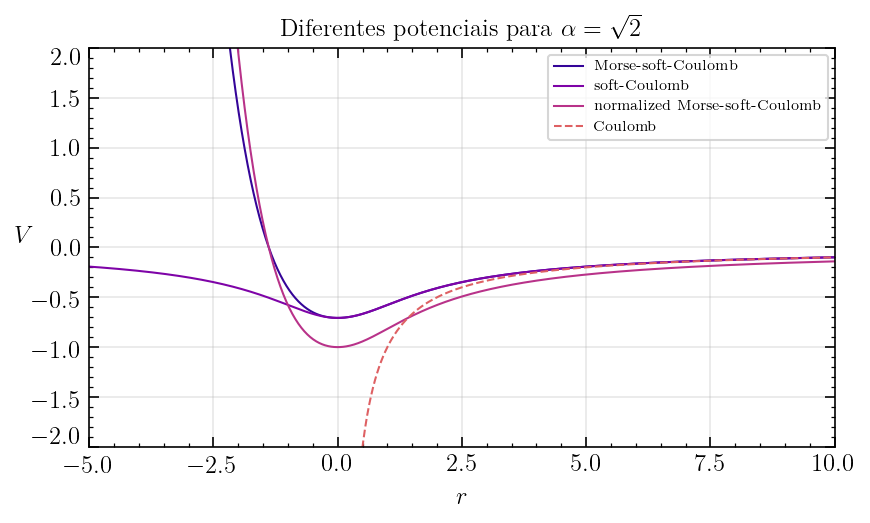

In [17]:
from emerald.potentials.coulomb_potential import C_potential_vec, C_return_points
from emerald.potentials.msc_potential import MsC_potential_vec, MsC_return_points
from emerald.potentials.sc_potential import sC_potential_vec, sC_return_points
from emerald.potentials.normalized_msc_potential import nMsC_potential_vec, nMsC_return_points

alpha = np.sqrt(2)
rs = np.linspace(-10, 10, 1000)
Cs = C_potential_vec(rs)
MsCs = MsC_potential_vec(alpha, rs)
sCs = sC_potential_vec(alpha, rs)
nMsCs = nMsC_potential_vec(alpha, rs)

plt.xlim(-5, 10)
plt.xticks(np.arange(-5, 12.5, 2.5))
plt.ylim( -2, 2)
plt.grid(alpha=0.3)

plt.xlabel("$r$")
plt.ylabel("$V$", rotation=0)

plt.plot(rs, MsCs, label="Morse-soft-Coulomb")
plt.plot(rs, sCs, label="soft-Coulomb")
plt.plot(rs, nMsCs, label="normalized Morse-soft-Coulomb")
plt.plot(rs, Cs, label="Coulomb", ls="dashed")
plt.title(r"Diferentes potenciais para $\alpha = \sqrt{2}$")
plt.gca().get_yticklabels()[0].set_verticalalignment("bottom")
plt.gca().get_yticklabels()[-1].set_verticalalignment("top")
plt.legend()
plt.savefig("Fig1a.pdf", bbox_inches="tight")
plt.show()

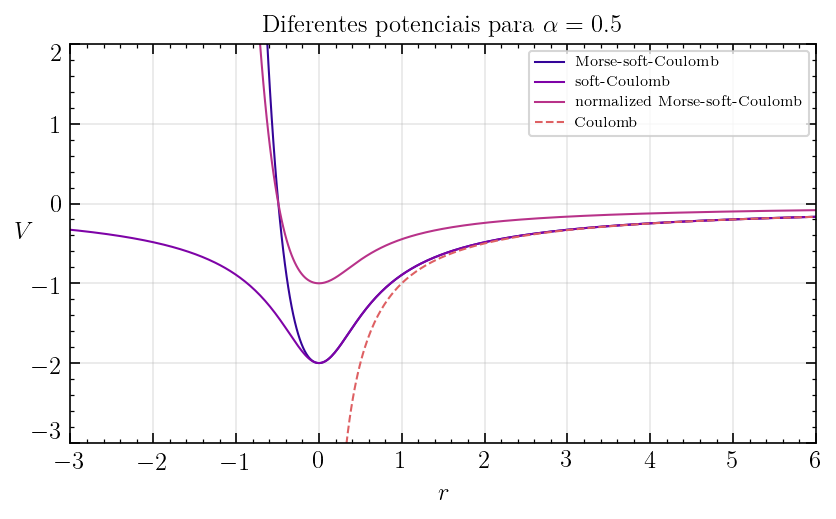

In [18]:
from emerald.potentials.coulomb_potential import C_potential_vec, C_return_points
from emerald.potentials.msc_potential import MsC_potential_vec, MsC_return_points
from emerald.potentials.sc_potential import sC_potential_vec, sC_return_points
from emerald.potentials.normalized_msc_potential import nMsC_potential_vec, nMsC_return_points

alpha = 0.5
rs = np.linspace(-10, 10, 1000)
Cs = C_potential_vec(rs)
MsCs = MsC_potential_vec(alpha, rs)
sCs = sC_potential_vec(alpha, rs)
nMsCs = nMsC_potential_vec(alpha, rs)

plt.xlim(-3, 6)
plt.ylim( -3, 2)
plt.grid(alpha=0.3)

plt.xlabel("$r$")
plt.ylabel("$V$", rotation=0)

plt.plot(rs, MsCs, label="Morse-soft-Coulomb")
plt.plot(rs, sCs, label="soft-Coulomb")
plt.plot(rs, nMsCs, label="normalized Morse-soft-Coulomb")
plt.plot(rs, Cs, label="Coulomb", ls="dashed")
plt.title(r"Diferentes potenciais para $\alpha = 0.5$")
plt.gca().get_yticklabels()[0].set_verticalalignment("bottom")
plt.gca().get_yticklabels()[-1].set_verticalalignment("top")
plt.legend()
plt.savefig("Fig1b.pdf", bbox_inches="tight")
plt.show()

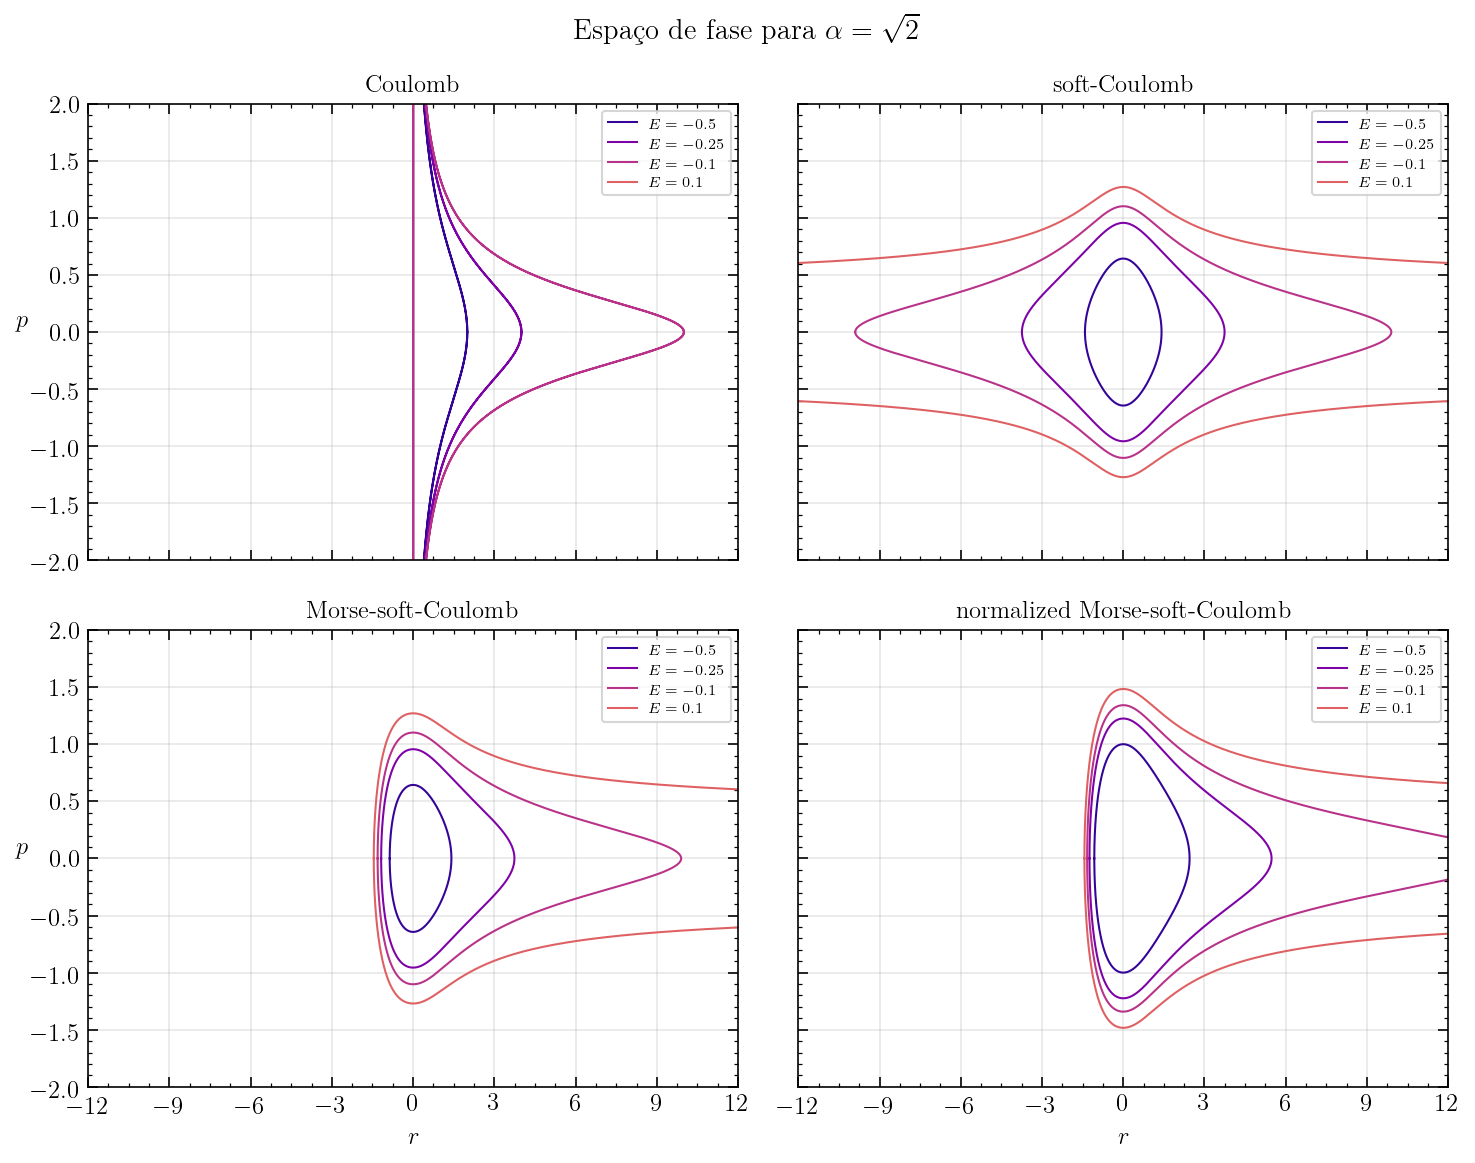

In [19]:
from emerald.classical.coulomb_unperturbed import C_phase_space
from emerald.classical.sc_unperturbed import sC_phase_space
from emerald.classical.msc_unperturbed import MsC_phase_space
from emerald.classical.normalized_msc_unperturbed import nMsC_phase_space


# Configuração do grid 2x2 de subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)  
plt.subplots_adjust(wspace=0.3, hspace=0.4) 

alpha = np.sqrt(2)
E_array = [-0.5, -0.25, -0.1, 0.1]

rM = 12

# Subplot 1
for E in E_array:
    phase_space = C_phase_space(E)
    axs[0, 0].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[0, 0].set_title('Coulomb', fontsize=12)
axs[0, 0].set_ylabel('$p$', rotation=0)
axs[0, 0].legend()
axs[0, 0].grid(alpha=0.3)

# Subplot 2
for E in E_array:
    phase_space = sC_phase_space(alpha, E, rM=rM+1)
    axs[0, 1].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[0, 1].set_title('soft-Coulomb', fontsize=12)
axs[0, 1].legend()
axs[0, 1].grid(alpha=0.3)

# Subplot 3
for E in E_array:
    phase_space = MsC_phase_space(alpha, E, rM=rM+1)
    axs[1, 0].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[1, 0].set_title('Morse-soft-Coulomb', fontsize=12)
axs[1, 0].set_xlabel('$r$')
axs[1, 0].set_ylabel('$p$', rotation=0)
axs[1, 0].legend()
axs[1, 0].grid(alpha=0.3)

# Subplot 4
for E in E_array:
    phase_space = nMsC_phase_space(alpha, E, rM=rM+1)
    axs[1, 1].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[1, 1].set_title('normalized Morse-soft-Coulomb', fontsize=12)
axs[1, 1].set_xlabel('$r$')
axs[1, 1].legend()
axs[1, 1].grid(alpha=0.3)

# Título
fig.suptitle(r'Espaço de fase para $\alpha = \sqrt{2}$', fontsize=14, y=0.98)

plt.xlim(-12, 12)
plt.xticks(np.arange(-12, 15, 3))
plt.ylim(-2, 2)
plt.tight_layout()
plt.savefig("Fig2a.pdf", bbox_inches="tight")
plt.show()

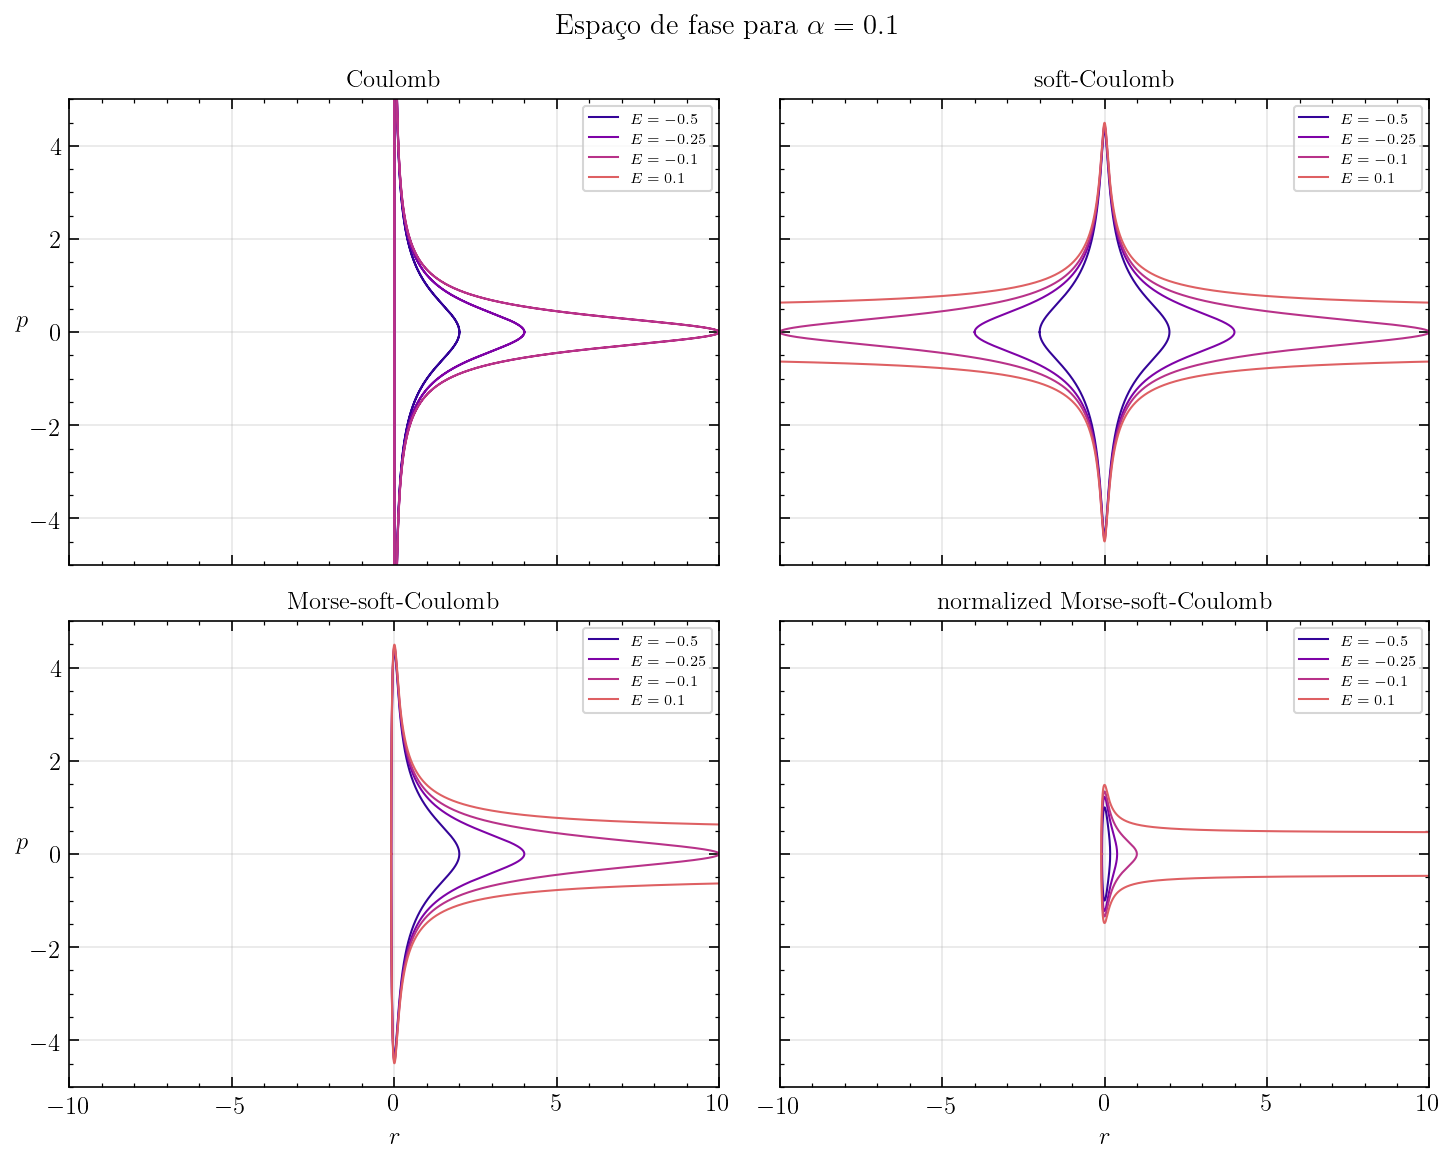

In [20]:
from emerald.classical.coulomb_unperturbed import C_phase_space
from emerald.classical.sc_unperturbed import sC_phase_space
from emerald.classical.msc_unperturbed import MsC_phase_space
from emerald.classical.normalized_msc_unperturbed import nMsC_phase_space


# Configuração do grid 2x2 de subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)  
plt.subplots_adjust(wspace=0.3, hspace=0.4) 

alpha = 0.1
E_array = [-0.5, -0.25, -0.1, 0.1]

rM = 12

# Subplot 1
for E in E_array:
    phase_space = C_phase_space(E)
    axs[0, 0].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[0, 0].set_title('Coulomb', fontsize=12)
axs[0, 0].set_ylabel('$p$', rotation=0)
axs[0, 0].legend()
axs[0, 0].grid(alpha=0.3)

# Subplot 2
for E in E_array:
    phase_space = sC_phase_space(alpha, E, rM=rM)
    axs[0, 1].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[0, 1].set_title('soft-Coulomb', fontsize=12)
axs[0, 1].legend()
axs[0, 1].grid(alpha=0.3)

# Subplot 3
for E in E_array:
    phase_space = MsC_phase_space(alpha, E, rM=rM)
    axs[1, 0].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[1, 0].set_title('Morse-soft-Coulomb', fontsize=12)
axs[1, 0].set_xlabel('$r$')
axs[1, 0].set_ylabel('$p$', rotation=0)
axs[1, 0].legend()
axs[1, 0].grid(alpha=0.3)

# Subplot 4
for E in E_array:
    phase_space = nMsC_phase_space(alpha, E, rM=rM)
    axs[1, 1].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[1, 1].set_title('normalized Morse-soft-Coulomb', fontsize=12)
axs[1, 1].set_xlabel('$r$')
axs[1, 1].legend()
axs[1, 1].grid(alpha=0.3)

# Título
fig.suptitle('Espaço de fase para $\\alpha = 0.1$', fontsize=14, y=0.98)

plt.xlim(-10, 10)
plt.xticks(np.arange(-10, 15, 5))
plt.ylim(-5, 5)
plt.tight_layout()
plt.savefig("Fig2b.pdf", bbox_inches="tight")
plt.show()

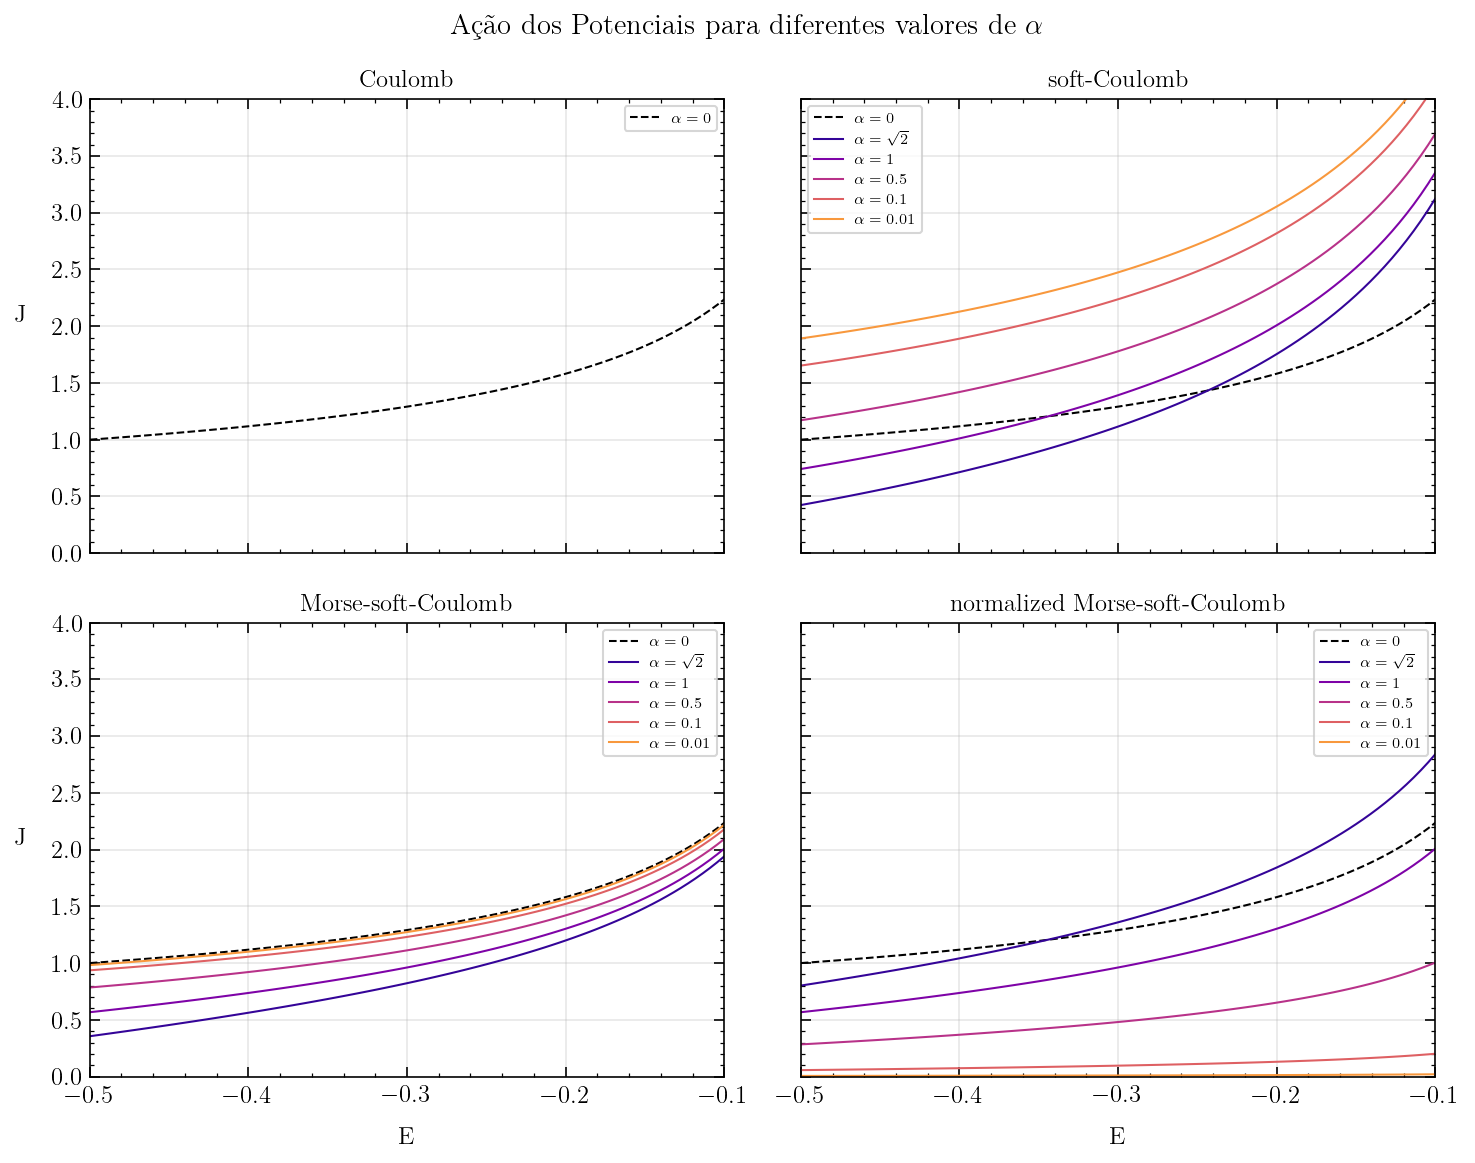

In [21]:
from emerald.classical.coulomb_unperturbed import C_action
from emerald.classical.sc_unperturbed import sC_action
from emerald.classical.msc_unperturbed import MsC_action
from emerald.classical.normalized_msc_unperturbed import nMsC_action

# Configuração do grid 2x2 de subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)  
plt.subplots_adjust(wspace=0.3, hspace=0.4) 

alpha_array = [np.sqrt(2), 1, 0.5, 0.1, 0.01]
E_range = np.linspace(-0.5, -0.05, 100)

rM = 12

# Subplot 1
for i in range(2):
    for j in range(2):
        axs[i, j].plot(E_range, [C_action(E) for E in E_range], label=f'$\\alpha=0$', ls='dashed', c="black")

axs[0, 0].set_title('Coulomb', fontsize=12)
axs[0, 0].set_ylabel('J', rotation=0, labelpad=15)
axs[0, 0].legend()
axs[0, 0].grid(alpha=0.3)

# Subplot 2
for alpha in alpha_array:
    axs[0, 1].plot(E_range, [sC_action(alpha, E) for E in E_range], label=f'$\\alpha={alpha if alpha != np.sqrt(2) else r"\sqrt{2}"}$')
axs[0, 1].set_title('soft-Coulomb', fontsize=12)
axs[0, 1].legend()
axs[0, 1].grid(alpha=0.3)

# Subplot 3
for alpha in alpha_array:
    axs[1, 0].plot(E_range, [MsC_action(alpha, E) for E in E_range], label=f'$\\alpha={alpha if alpha != np.sqrt(2) else r"\sqrt{2}"}$')
axs[1, 0].set_title('Morse-soft-Coulomb', fontsize=12)
axs[1, 0].legend()
axs[1, 0].set_ylabel('J', rotation=0, labelpad=15)
axs[1, 0].set_xlabel('E', labelpad=10)
axs[1, 0].set_xticks(np.arange(-0.5, 0, 0.1))
axs[1, 0].grid(alpha=0.3)

# Subplot 4
for alpha in alpha_array:
    axs[1, 1].plot(E_range, [nMsC_action(alpha, E) for E in E_range], label=f'$\\alpha={alpha if alpha != np.sqrt(2) else r"\sqrt{2}"}$')
axs[1, 1].set_title('normalized Morse-soft-Coulomb', fontsize=12)
axs[1, 1].legend()
axs[1, 1].set_xlabel('E', labelpad=10)
axs[1, 1].set_xticks(np.arange(-0.5, 0, 0.1))
axs[1, 1].grid(alpha=0.3)

# Título
fig.suptitle(r'Ação dos Potenciais para diferentes valores de $\alpha$', fontsize=14, y=0.98)

plt.xlim(-0.5, -0.1)
plt.ylim(0, 4)
plt.tight_layout()
plt.savefig("Fig3.pdf", bbox_inches="tight")
plt.show()

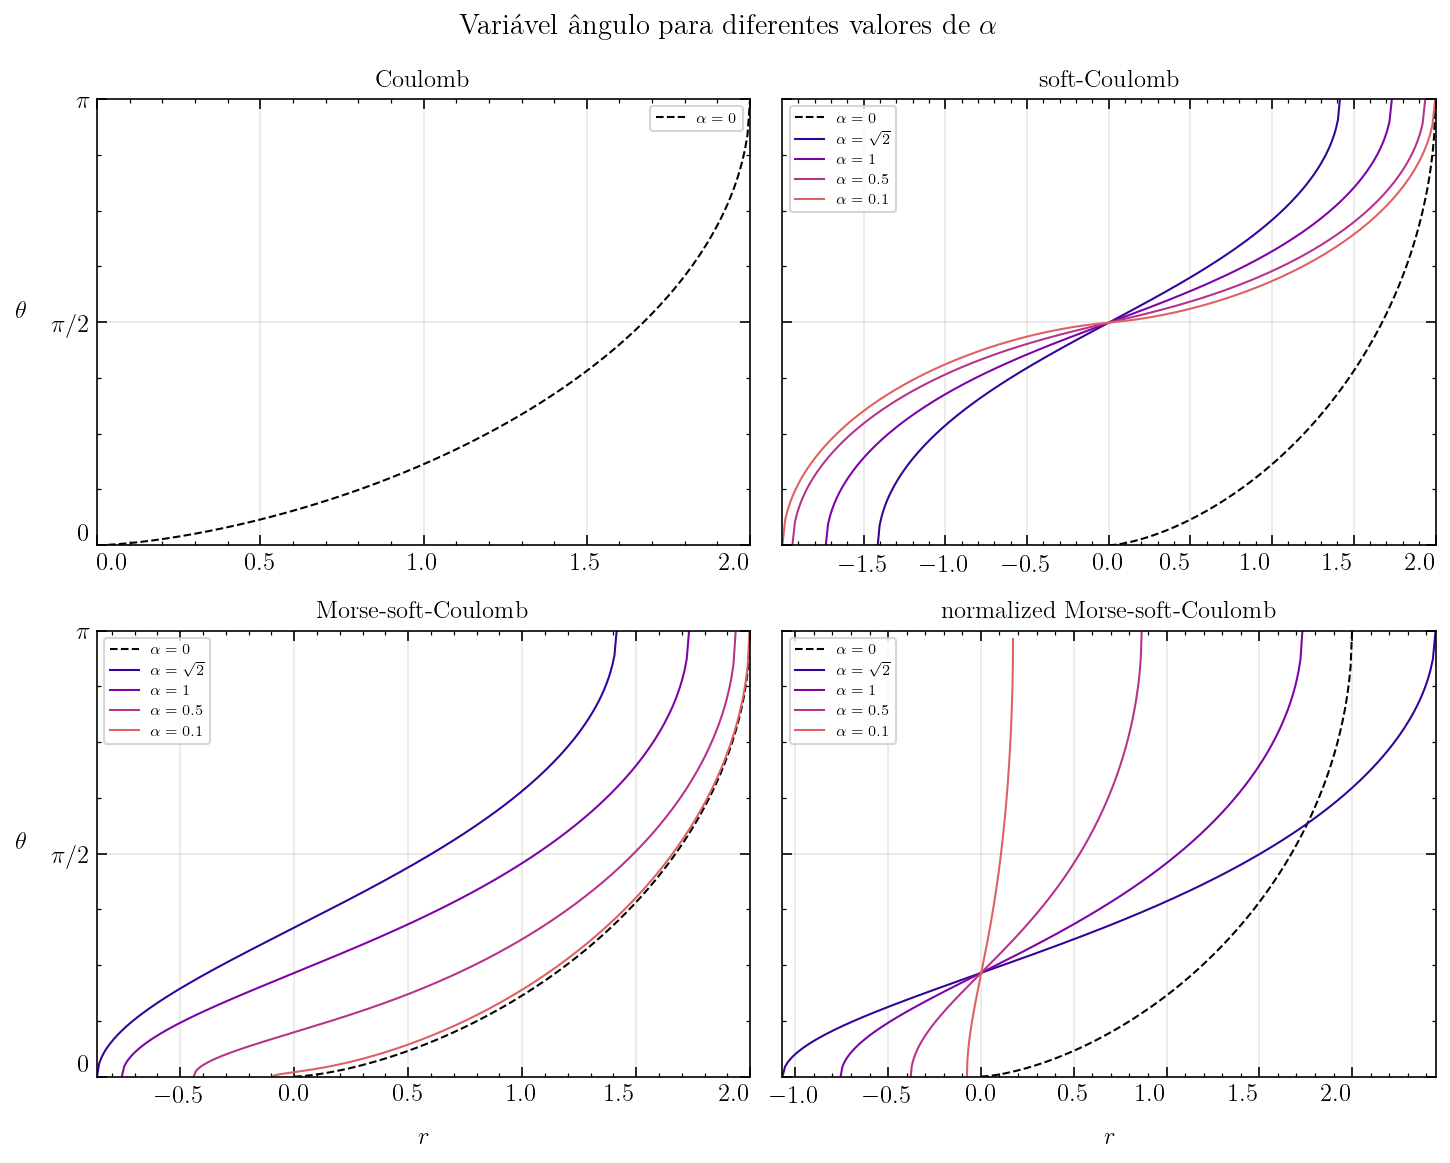

In [22]:
from emerald.classical.coulomb_unperturbed import C_angle, C_position
from emerald.classical.sc_unperturbed import sC_angle, sC_position, sC_angular_frequency
from emerald.classical.msc_unperturbed import MsC_angle, MsC_position, MsC_angular_frequency
from emerald.classical.normalized_msc_unperturbed import nMsC_angle, nMsC_position, nMsC_angular_frequency

# Configuração do grid 2x2 de subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=False, sharey=True)  
plt.subplots_adjust(wspace=0.3, hspace=0.4) 

alpha_array = [np.sqrt(2), 1, 0.5, 0.1]
#E_range = np.linspace(-0.5, -0.05, 100)

#rM = 12

E = -0.5

# Subplot 1
N = 250

rm, rM = C_return_points(E)
position_range = np.linspace(rm, rM, N)
angles = [C_angle(E, r) for r in position_range]
for i in range(2):
    for j in range(2):
        axs[i, j].plot(position_range, angles, label=f'$\\alpha=0$', ls='dashed', c='black')
        axs[i, j].get_xticklabels()[0].set_horizontalalignment("right")
        axs[i, j].grid(alpha=0.3)

axs[0, 0].get_xticklabels()[-1].set_horizontalalignment("right")
axs[0, 0].get_xticklabels()[0].set_horizontalalignment("left")
axs[0, 0].set_title('Coulomb', fontsize=12)
axs[0, 0].set_ylabel('$\\theta$', rotation=0, labelpad=15)
axs[0, 0].set_xticks(np.arange(0, 2.5, 0.5))
axs[0, 0].get_yticklabels()[-1].set_verticalalignment("top")
axs[0, 0].get_yticklabels()[0].set_verticalalignment("bottom")
axs[0, 0].legend()


# Subplot 2
for alpha in alpha_array:
    rm, rM = sC_return_points(alpha, E)
    freq = sC_angular_frequency(alpha, E)
    position_range = np.linspace(rm, rM, N)
    angles = [sC_angle(alpha, E, r, freq) for r in position_range]
    axs[0, 1].plot(position_range, angles, label=f'$\\alpha={alpha if alpha != np.sqrt(2) else r"\sqrt{2}"}$')
axs[0, 1].set_title('soft-Coulomb', fontsize=12)
axs[0, 1].legend()

# Subplot 3
for alpha in alpha_array:
    rm, rM = MsC_return_points(alpha, E)
    freq = MsC_angular_frequency(alpha, E)
    position_range = np.linspace(rm, rM, N)
    angles = [MsC_angle(alpha, E, r, freq) for r in position_range]
    axs[1, 0].plot(position_range, angles, label=f'$\\alpha={alpha if alpha != np.sqrt(2) else r"\sqrt{2}"}$')
axs[1, 0].set_ylabel('$\\theta$', rotation = 0, labelpad=15)
axs[1, 0].set_xlabel('$r$', labelpad=10)
axs[1, 0].get_yticklabels()[-1].set_verticalalignment("top")
axs[1, 0].get_yticklabels()[0].set_verticalalignment("bottom")
axs[1, 0].set_title('Morse-soft-Coulomb', fontsize=12)
axs[1, 0].legend()

# Subplot 4
for alpha in alpha_array:
    rm, rM = nMsC_return_points(alpha, E)
    freq = nMsC_angular_frequency(alpha, E)
    position_range = np.linspace(rm, rM, N)
    angles = [nMsC_angle(alpha, E, r, freq) for r in position_range]
    axs[1, 1].plot(position_range, angles, label=f'$\\alpha={alpha if alpha != np.sqrt(2) else r"\sqrt{2}"}$')
axs[1, 1].set_xlabel('$r$', labelpad=10)
axs[1, 1].set_title('normalized Morse-soft-Coulomb', fontsize=12)
axs[1, 1].legend()

# Título
fig.suptitle(r'Variável ângulo para diferentes valores de $\alpha$', fontsize=14, y=0.98)

#plt.xlim(-0.5, -0.1)
plt.ylim(0, np.pi)
plt.yticks( [0, np.pi/2, np.pi], ['$0$', '$\\pi/2$', '$\\pi$'] )
plt.tight_layout()
plt.savefig("Fig4.pdf", bbox_inches="tight")
plt.show()

## Teste de Seção de Poincaré nas variáveis ângulo e energia
1. Potencial soft-Coulomb

In [1]:
import emerald

In [3]:
import numpy as np
from emerald.classical.normalized_msc_poincare import nMsC_poincare_energies

data = nMsC_poincare_energies(0.5, np.array([-0.45, -0.5, -0.55]) ,0.01, 1, 100, 20, np.pi/2, 1.e-4)

Condições iniciais calculadas
Condições iniciais calculadas
Condições iniciais calculadas


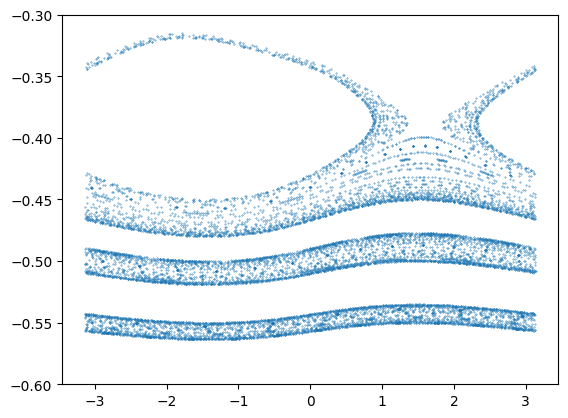

In [7]:
import matplotlib.pyplot as plt

plt.scatter( *data.T, s=0.1 )
plt.ylim(-0.6, -0.3)
plt.show()

```α = 0.5 ; E_array = [-0.45, -0.5, -0.55]```

# Coulomb
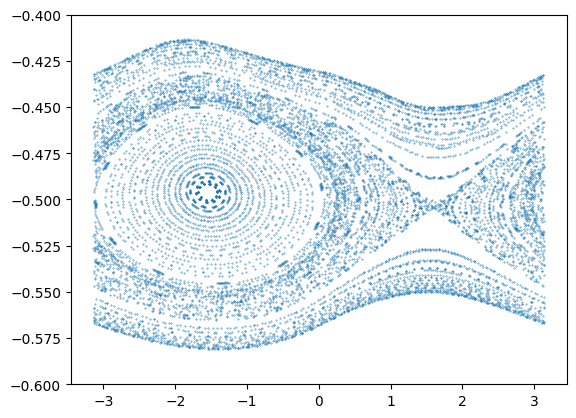
---
# Morse-soft-Coulomb
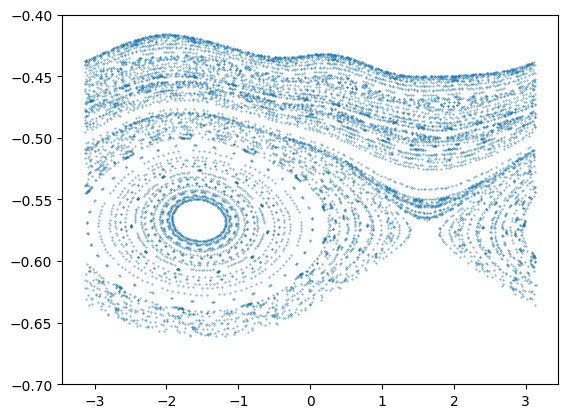
---
# soft-Coulomb
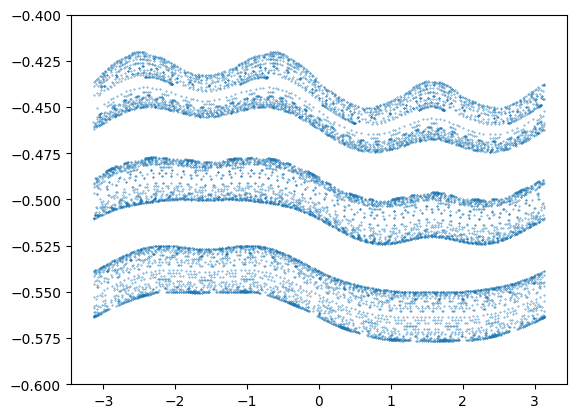
---
# normalized Morse-soft-Coulomb
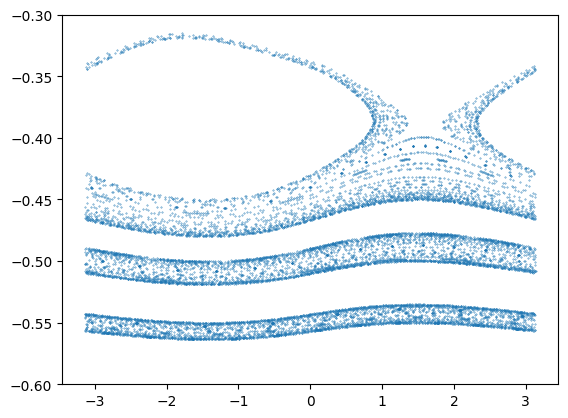